# W3-sequencing_of_LLPMBPKK_05956_CRISPRi_plasmids

Pipeline for sequencing of GÖ4010 regulators after transformation into E. coli

In [1]:
from pathlib import Path
from Bio import SeqIO
import pandas as pd
import pandas as pd
from Bio import SeqIO


def read_genbank_files(folder_path):
    """
    Reads all GenBank (.gb, .gbk) files in the given folder and returns
    a list of SeqRecord objects (one per record in every file).
    """
    folder = Path(folder_path)
    records = []
    # match .gb, .gbk, .gbff
    for gb_file in folder.glob("*.gb*"):
        for rec in SeqIO.parse(gb_file, "genbank"):
            records.append(rec)
    return records


In [2]:
crispr_plasmids = read_genbank_files('plasmids/')

# Change their names: 
for rec in crispr_plasmids:
    print(rec.id)
    # split on the first underscore and keep everything after
    new_label = rec.id.split('_', 1)[1]
    rec.id   = new_label
    rec.name = new_label

crispr_plasmids 

pCRISPRi_LLPMBPKK_05956_p-47
pCRISPRi_LLPMBPKK_05956_p-29_#2
pCRISPRi_LLPMBPKK_05956_p-19_#4
pCRISPRi_LLPMBPKK_05956_p-47_#1
pCRISPRi_LLPMBPKK_05956_p-20_#3
pCRISPRi_LLPMBPKK_05956_p-29
pCRISPRi_LLPMBPKK_05956_p60_#5


[SeqRecord(seq=Seq('TATGGACAAGAAGTACTCCATCGGCCTCGCGATCGGCACCAACTCCGTGGGCTG...ACA'), id='LLPMBPKK_05956_p-47', name='LLPMBPKK_05956_p-47', description='Assembled plasmid targeting LLPMBPKK_05956 for single gene KNOCK-DOWN, assembled using StreptoCAD.', dbxrefs=[]),
 SeqRecord(seq=Seq('GGTTTTAGAGCTAGAAATAGCAAGTTAAAATAAGGCTAGTCCGTTATCAACTTG...CGT'), id='LLPMBPKK_05956_p-29_#2', name='LLPMBPKK_05956_p-29_#2', description='Assembled plasmid targeting LLPMBPKK_05956 for single gene KNOCK-DOWN, assembled using StreptoCAD.', dbxrefs=[]),
 SeqRecord(seq=Seq('GGTTTTAGAGCTAGAAATAGCAAGTTAAAATAAGGCTAGTCCGTTATCAACTTG...GCC'), id='LLPMBPKK_05956_p-19_#4', name='LLPMBPKK_05956_p-19_#4', description='Assembled plasmid targeting LLPMBPKK_05956 for single gene KNOCK-DOWN, assembled using StreptoCAD.', dbxrefs=[]),
 SeqRecord(seq=Seq('GGTTTTAGAGCTAGAAATAGCAAGTTAAAATAAGGCTAGTCCGTTATCAACTTG...CGT'), id='LLPMBPKK_05956_p-47_#1', name='LLPMBPKK_05956_p-47_#1', description='Assembled plasmid targeting LLPMBPKK

In [3]:
ref_dict = {rec.id: rec for rec in crispr_plasmids}
ref_dict


{'LLPMBPKK_05956_p-47': SeqRecord(seq=Seq('TATGGACAAGAAGTACTCCATCGGCCTCGCGATCGGCACCAACTCCGTGGGCTG...ACA'), id='LLPMBPKK_05956_p-47', name='LLPMBPKK_05956_p-47', description='Assembled plasmid targeting LLPMBPKK_05956 for single gene KNOCK-DOWN, assembled using StreptoCAD.', dbxrefs=[]),
 'LLPMBPKK_05956_p-29_#2': SeqRecord(seq=Seq('GGTTTTAGAGCTAGAAATAGCAAGTTAAAATAAGGCTAGTCCGTTATCAACTTG...CGT'), id='LLPMBPKK_05956_p-29_#2', name='LLPMBPKK_05956_p-29_#2', description='Assembled plasmid targeting LLPMBPKK_05956 for single gene KNOCK-DOWN, assembled using StreptoCAD.', dbxrefs=[]),
 'LLPMBPKK_05956_p-19_#4': SeqRecord(seq=Seq('GGTTTTAGAGCTAGAAATAGCAAGTTAAAATAAGGCTAGTCCGTTATCAACTTG...GCC'), id='LLPMBPKK_05956_p-19_#4', name='LLPMBPKK_05956_p-19_#4', description='Assembled plasmid targeting LLPMBPKK_05956 for single gene KNOCK-DOWN, assembled using StreptoCAD.', dbxrefs=[]),
 'LLPMBPKK_05956_p-47_#1': SeqRecord(seq=Seq('GGTTTTAGAGCTAGAAATAGCAAGTTAAAATAAGGCTAGTCCGTTATCAACTTG...CGT'), id='LLPM

In [4]:
# 1) Define metadata table

data = {
    "Sample": ["p313", "p314", "p315", "p316", "p317"],
    "Primer": ["CW1", "CW1", "CW1", "CW1", "CW1"],
    "Sequencing ID": ["EF71614652", "EF71614661", "EF71614662", "EF71614663", "EF73913363"],
    "Result": ["Correct", "Correct", "Correct", "Correct", "Correct"],
    "Goe Primer": ["Goe"]*5,
    "Plasmid Construct": [
        "pCRISPRi_LLPMBPKK_05956_p-47_#1",
        "pCRISPRi_LLPMBPKK_05956_p-29_#2",
        "pCRISPRi_LLPMBPKK_05956_p-20_#3",
        "pCRISPRi_LLPMBPKK_05956_p-19_#4",
        "pCRISPRi_LLPMBPKK_05956_p60_#5"
    ]
}

meta_data_df = pd.DataFrame(data)
meta_data_df

,Sample,Primer,Sequencing ID,Result,Goe Primer,Plasmid Construct
0,p313,CW1,EF71614652,Correct,Goe,pCRISPRi_LLPMBPKK_05956_p-47_#1
1,p314,CW1,EF71614661,Correct,Goe,pCRISPRi_LLPMBPKK_05956_p-29_#2
2,p315,CW1,EF71614662,Correct,Goe,pCRISPRi_LLPMBPKK_05956_p-20_#3
3,p316,CW1,EF71614663,Correct,Goe,pCRISPRi_LLPMBPKK_05956_p-19_#4
4,p317,CW1,EF73913363,Correct,Goe,pCRISPRi_LLPMBPKK_05956_p60_#5


# For each row align and make chromatogram plots (ab1-->GB)

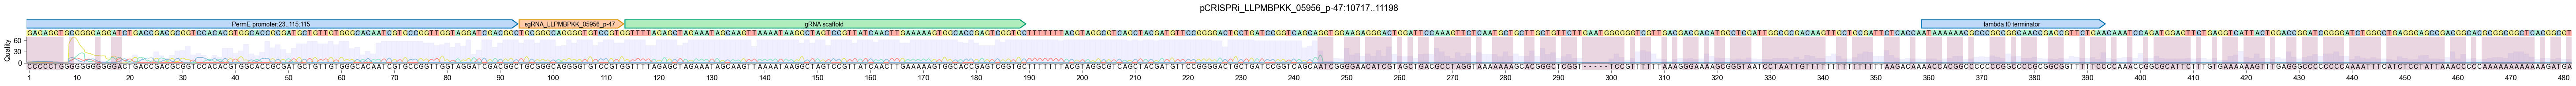

In [5]:
from pathlib import Path
import matplotlib.pyplot as plt
from sangerseq_viewer.sangerseq_viewer import view_sanger

SEQ_DIR = Path("sequencing_files/")
GBK_DIR = Path("plasmids/")


for _, row in meta_data_df.iterrows():
    ab1_id         = row["Sequencing ID"]
    sample         = row["Sample"]        # e.g., 'p313'
    plasmid_no     = sample.replace('p', '')  # e.g., '313'
    read_direction = "F"                  # Or leave as None if not needed
    ref_id         = row["Plasmid Construct"]
    locus_tag      = ref_id               # Use ref_id if no locus_tag column

    ab1_path = SEQ_DIR / f"{ab1_id}_{ab1_id}.ab1"
    if not ab1_path.exists():
        print("Missing AB1:", ab1_path)
        continue

    # find the GBK that contains your ref_id
    matches = list(GBK_DIR.glob(f"*{ref_id}*.gb*"))
    if not matches:
        print("Missing GBK for", ref_id)
        continue

    gbk_path = matches[0]

    # 3) call view_sanger with that window (positional args):
    #    (gbkpath, abipath, start, end, linebreak, output, display_quality, dpi)
    fig = view_sanger(
        str(gbk_path),    # path to your GenBank/GFF file
        str(ab1_path),    # path (or dir) with your .ab1 traces
        start=None, # int
        end=None,   # int
        linebreak=None,        # wrap every 200 bp
        output=f'sequencing_files/chromatograms/sanger_P{plasmid_no}',     # path or None
        display_quality=True,  # bool
        dpi=300    # int
    )

    plt.show()


### Processing chromatogram plots

In [6]:
import os
from PIL import Image
import glob

input_dir = "sequencing_files/chromatograms"
output_dir = "sequencing_files/chromatogram_plots_chopped"
n = 2


os.makedirs(output_dir, exist_ok=True)

for img_path in glob.glob(os.path.join(input_dir, "*.jpg")) + glob.glob(os.path.join(input_dir, "*.png")):
    filename = os.path.basename(img_path)
    name, ext = os.path.splitext(filename)
    
    img = Image.open(img_path)
    w, h = img.size
    chunk_width = w // n
    pieces = []
    for i in range(n):
        left = i * chunk_width
        right = (i + 1) * chunk_width if i < n-1 else w
        piece = img.crop((left, 0, right, h))
        pieces.append(piece)
    
    # Create a new image tall enough to hold all pieces, width of one chunk
    stacked_img = Image.new('RGB', (chunk_width, h * n))
    for i, piece in enumerate(pieces):
        stacked_img.paste(piece, (0, i * h))
    
    output_path = os.path.join(output_dir, f"{name}_stacked{ext}")
    stacked_img.save(output_path)
    print(f"Processed {filename} -> {output_path}")


Processed sanger_P314.png -> sequencing_files/chromatogram_plots_chopped/sanger_P314_stacked.png
Processed sanger_P315.png -> sequencing_files/chromatogram_plots_chopped/sanger_P315_stacked.png
Processed sanger_P317.png -> sequencing_files/chromatogram_plots_chopped/sanger_P317_stacked.png
Processed sanger_P316.png -> sequencing_files/chromatogram_plots_chopped/sanger_P316_stacked.png
Processed sanger_P313.png -> sequencing_files/chromatogram_plots_chopped/sanger_P313_stacked.png


In [7]:
import os
from PIL import Image
import glob
import numpy as np

input_dir = "sequencing_files/chromatograms"
output_dir = "sequencing_files/chromatogram_plots_chopped"
target_chunk_width = 8000  # You can adjust this

os.makedirs(output_dir, exist_ok=True)

# If you want to set the target chunk width based on your actual image set:
widths = []
for img_path in glob.glob(os.path.join(input_dir, "*.jpg")) + glob.glob(os.path.join(input_dir, "*.png")):
    with Image.open(img_path) as img:
        widths.append(img.size[0])
# Example: use the median image width for target_chunk_width
# target_chunk_width = int(np.median(widths))

for img_path in glob.glob(os.path.join(input_dir, "*.jpg")) + glob.glob(os.path.join(input_dir, "*.png")):
    filename = os.path.basename(img_path)
    name, ext = os.path.splitext(filename)

    img = Image.open(img_path)
    w, h = img.size

    n_chunks = max(1, round(w / target_chunk_width))
    chunk_width = w // n_chunks

    pieces = []
    for i in range(n_chunks):
        left = i * chunk_width
        right = (i + 1) * chunk_width if i < n_chunks - 1 else w
        piece = img.crop((left, 0, right, h))
        pieces.append(piece)

    # Create a new image tall enough to hold all pieces, width of one chunk
    stacked_img = Image.new('RGB', (chunk_width, h * n_chunks))
    for i, piece in enumerate(pieces):
        # Optionally, resize each chunk to (chunk_width, h) for strict uniformity
        stacked_img.paste(piece.resize((chunk_width, h)), (0, i * h))

    output_path = os.path.join(output_dir, f"{name}_stacked{ext}")
    stacked_img.save(output_path)
    print(f"Processed {filename} -> {output_path}")


Processed sanger_P314.png -> sequencing_files/chromatogram_plots_chopped/sanger_P314_stacked.png
Processed sanger_P315.png -> sequencing_files/chromatogram_plots_chopped/sanger_P315_stacked.png
Processed sanger_P317.png -> sequencing_files/chromatogram_plots_chopped/sanger_P317_stacked.png
Processed sanger_P316.png -> sequencing_files/chromatogram_plots_chopped/sanger_P316_stacked.png
Processed sanger_P313.png -> sequencing_files/chromatogram_plots_chopped/sanger_P313_stacked.png


In [8]:
import os
from PIL import Image
import glob

input_dir = "sequencing_files/chromatograms"
output_dir = "sequencing_files/chromatogram_plots_left500"
crop_width = 500*15  # Number of pixels to keep from the left

os.makedirs(output_dir, exist_ok=True)

for img_path in glob.glob(os.path.join(input_dir, "*.jpg")) + glob.glob(os.path.join(input_dir, "*.png")):
    filename = os.path.basename(img_path)
    name, ext = os.path.splitext(filename)

    img = Image.open(img_path)
    w, h = img.size

    # Ensure we don't go out of bounds
    right = min(crop_width, w)

    # Crop: (left, upper, right, lower)
    cropped = img.crop((0, 0, right, h))

    output_path = os.path.join(output_dir, f"{name}_left{crop_width}{ext}")
    cropped.save(output_path)
    print(f"Processed {filename} -> {output_path}")


Processed sanger_P314.png -> sequencing_files/chromatogram_plots_left500/sanger_P314_left7500.png
Processed sanger_P315.png -> sequencing_files/chromatogram_plots_left500/sanger_P315_left7500.png
Processed sanger_P317.png -> sequencing_files/chromatogram_plots_left500/sanger_P317_left7500.png
Processed sanger_P316.png -> sequencing_files/chromatogram_plots_left500/sanger_P316_left7500.png
Processed sanger_P313.png -> sequencing_files/chromatogram_plots_left500/sanger_P313_left7500.png


In [9]:
len('gcggtcgatcttgacggctggcgagaggtgcggggaggatctgaccgacgcggtccacacgtggcaccgcgatgctgttgtgggcacaatcgtgccggttggtaggatcgacggC')

115